<a href="https://colab.research.google.com/github/seecode4/seeRepo1/blob/main/Student_MLE_MiniProject_Fine_Tuning/Student_MLE_MiniProject_Fine_Tuning_m1_m2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Transfer Learning with Keras

Transfer learning is a machine learning technique where a model trained on one task is used as a starting point to solve a different but related task. Instead of training a model from scratch, transfer learning leverages the knowledge learned from the source task and applies it to the target task. This approach is especially useful when the target task has limited data or computational resources.

In transfer learning, the pre-trained model, also known as the "base model" or "source model," is typically trained on a large dataset and a more general problem (e.g., image classification on ImageNet, a vast dataset with millions of labeled images). The knowledge learned by the base model in the form of feature representations and weights captures common patterns and features in the data.

To perform transfer learning, the following steps are commonly followed:

1. Pre-training: The base model is trained on a source task using a large dataset, which can take a considerable amount of time and computational resources.

2. Feature Extraction: After pre-training, the base model is used as a feature extractor. The last few layers (classifier layers) of the model are discarded, and the remaining layers (feature extraction layers) are retained. These layers serve as feature extractors, producing meaningful representations of the data.

3. Fine-tuning: The feature extraction layers and sometimes some of the earlier layers are connected to a new set of layers, often called the "classifier layers" or "task-specific layers." These layers are randomly initialized, and the model is trained on the target task with a smaller dataset. The weights of the base model can be frozen during fine-tuning, or they can be allowed to be updated with a lower learning rate to fine-tune the model for the target task.

Transfer learning has several benefits:

1. Reduced training time and resource requirements: Since the base model has already learned generic features, transfer learning can save time and resources compared to training a model from scratch.

2. Improved generalization: Transfer learning helps the model generalize better to the target task, especially when the target dataset is small and dissimilar from the source dataset.

3. Better performance: By starting from a model that is already trained on a large dataset, transfer learning can lead to better performance on the target task, especially in scenarios with limited data.

4. Effective feature extraction: The feature extraction layers of the pre-trained model can serve as powerful feature extractors for different tasks, even when the task domains differ.

Transfer learning is commonly used in various domains, including computer vision, natural language processing (NLP), and speech recognition, where pre-trained models are fine-tuned for specific applications like object detection, sentiment analysis, or speech-to-text.

In this mini-project you will perform fine-tuning using Keras with a pre-trained VGG16 model on the CIFAR-10 dataset.

First, import all the libraries you'll need.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import resize_images
from sklearn.model_selection import train_test_split

The CIFAR-10 dataset is a widely used benchmark dataset in the field of computer vision and machine learning. It stands for the "Canadian Institute for Advanced Research 10" dataset. CIFAR-10 was created by researchers at the CIFAR institute and was originally introduced as part of the Neural Information Processing Systems (NIPS) 2009 competition.

The dataset consists of 60,000 color images, each of size 32x32 pixels, belonging to ten different classes. Each class contains 6,000 images. The ten classes in CIFAR-10 are:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

The images are evenly distributed across the classes, making CIFAR-10 a balanced dataset. The dataset is divided into two sets: a training set and a test set. The training set contains 50,000 images, while the test set contains the remaining 10,000 images.

CIFAR-10 is often used for tasks such as image classification, object recognition, and transfer learning experiments. The relatively small size of the images and the variety of classes make it a challenging dataset for training machine learning models, especially deep neural networks. It also serves as a good dataset for teaching and learning purposes due to its manageable size and straightforward class labels.

Here are your tasks:

1. Load the CIFAR-10 dataset after referencing the documentation [here](https://keras.io/api/datasets/cifar10/).
2. Normalize the pixel values so they're all in the range [0, 1].
3. Apply One Hot Encoding to the train and test labels using the [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) function.
4. Further split the the training data into training and validation sets using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use only 10% of the data for validation.  

In [ ]:
# Load the CIFAR-10 dataset
cifar_home = 'https://www.cs.toronto.edu/~kriz/cifar.html'
# from tensorflow.keras.datasets import cifar10
%cd /content
!pwd
!rm -fr cifar*
!ls
print('---------')
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()
assert x_train_val.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train_val.shape == (50000, 1)
assert y_test.shape == (10000, 1)
print(f'x_train_val type: {type(x_train_val)}, ndim:{x_train_val.ndim}, shape:{x_train_val.shape}')
print(f'{x_train_val[0][0][0:10]}')

/content
/content
sample_data
---------
170498071/170498071 [==============================] - 2s 0us/step
x_train_val type: <class 'numpy.ndarray'>, ndim:4, shape:(50000, 32, 32, 3)
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]]


In [ ]:
url = 'http://people.csail.mit.edu/torralba/tinyimages/'
cifar_10_python_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!ls

--2024-09-27 22:41:14--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  58.4MB/s    in 2.8s    

2024-09-27 22:41:17 (58.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-python.tar.gz	sample_data


In [ ]:
!tar xfz cifar-10-python.tar.gz
!ls

cifar-10-batches-py  cifar-10-python.tar.gz  sample_data


In [ ]:
!ls -lrt /content
!pwd
print('ls -l cifar-10-batches-py')
!ls -l cifar-10-batches-py
%cd /content/cifar-10-batches-py

total 166512
drwxr-xr-x 2 2156 1103      4096 Jun  4  2009 cifar-10-batches-py
-rw-r--r-- 1 root root 170498071 Jun  4  2009 cifar-10-python.tar.gz
drwxr-xr-x 1 root root      4096 Sep 24 13:23 sample_data
/content
ls -l cifar-10-batches-py
total 181876
-rw-r--r-- 1 2156 1103      158 Mar 31  2009 batches.meta
-rw-r--r-- 1 2156 1103 31035704 Mar 31  2009 data_batch_1
-rw-r--r-- 1 2156 1103 31035320 Mar 31  2009 data_batch_2
-rw-r--r-- 1 2156 1103 31035999 Mar 31  2009 data_batch_3
-rw-r--r-- 1 2156 1103 31035696 Mar 31  2009 data_batch_4
-rw-r--r-- 1 2156 1103 31035623 Mar 31  2009 data_batch_5
-rw-r--r-- 1 2156 1103       88 Jun  4  2009 readme.html
-rw-r--r-- 1 2156 1103 31035526 Mar 31  2009 test_batch
/content/cifar-10-batches-py


In [ ]:
!pwd

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Look at the first batch of data
i = 1
fname = f'./data_batch_{i+1}'
print(fname)
dblist = []
for i in range(5):
  dblist.append(unpickle(f'./data_batch_{i+1}'))
print(type(dblist[0]))
db1 = dblist[0]
for key, value in db1.items():
    print(key, ':', value)
print(len(dblist))
print(f"db1 info:", type(db1), len(db1), len(db1[b'data']))
print(f"db1[b'data'][0] info", type(db1[b'data'][0]), len(db1[b'data'][0]), (32*32*3))

/content/cifar-10-batches-py
./data_batch_2
<class 'dict'>
b'batch_label' : b'training batch 1 of 5'
b'labels' : [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9

In [ ]:
# Normalize the pixel values to [0, 1]
np.set_printoptions(precision=4)
X_train_val = x_train_val/255
print(f'X_train_val:\n {X_train_val[0][0][0:10]}...')
X_test = x_test/255
print(f'X_test:\n {X_test[0][0][0:10]}...')

X_train_val:
 [[0.2314 0.2431 0.2471]
 [0.1686 0.1804 0.1765]
 [0.1961 0.1882 0.1686]
 [0.2667 0.2118 0.1647]
 [0.3843 0.2863 0.2039]
 [0.4667 0.3569 0.2471]
 [0.5451 0.4196 0.2941]
 [0.5686 0.4314 0.3137]
 [0.5843 0.4588 0.349 ]
 [0.5843 0.4706 0.3647]]...
X_test:
 [[0.6196 0.4392 0.1922]
 [0.6235 0.4353 0.1843]
 [0.6471 0.4549 0.2   ]
 [0.651  0.4627 0.2078]
 [0.6275 0.4392 0.1804]
 [0.6118 0.4275 0.1608]
 [0.6353 0.451  0.1843]
 [0.6235 0.4431 0.1765]
 [0.6196 0.4353 0.1725]
 [0.6235 0.4431 0.1608]]...


In [ ]:
!ls -lrt
print(f'y_train:\n {y_train_val[0:10].T}')
y_unique, counts = np.unique(y_train_val, return_counts=True)
print(np.asarray((y_unique, counts)))

total 4
drwxr-xr-x 1 root root 4096 Sep 25 18:24 sample_data
y_train:
 [[6 9 9 4 1 1 2 7 8 3]]
[[   0    1    2    3    4    5    6    7    8    9]
 [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]]


In [ ]:
# One-hot encode the labels
# depth = len(y_unique)
# y_train_val_1hot_tf = tf.one_hot(y_train_val, depth)
# y_test_1hot_tf = tf.one_hot(y_test, depth)
# tf_shape = y_train_val_1hot_tf.shape
# y_train_val_1hot = tf.reshape(y_train_val_1hot_tf,
#                               (tf_shape[0], tf_shape[1]*tf_shape[2]))
# tf_shape = y_test_1hot_tf.shape
# y_test_1hot = tf.reshape(y_test_1hot_tf,
#                          (tf_shape[0], tf_shape[1]*tf_shape[2]))
# #.swapaxes(1,2).reshape(3,-1)
# print('train_val:\n', X_train_val.shape, y_train_val_1hot.shape)
# print('test_val:\n', X_test.shape, y_test_1hot.shape)

In [ ]:
# One-hot encode the labels - with to_categorical
num_classes = 10
y_train_val_1hot = to_categorical(y_train_val, num_classes)
y_test_1hot= to_categorical(y_test, num_classes)
print(y_train_val_1hot.shape, y_test_1hot.shape)

(50000, 10) (10000, 10)


In [ ]:
# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=1)
# print(X_train.shape, y_train.shape)
# print(X_val.shape, y_val.shape)

In [ ]:
# Config to make results repeatable/deterministic
tf.config.experimental.enable_op_determinism()
np.random.seed(1)
SEED=43
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

VGG16 (Visual Geometry Group 16) is a deep convolutional neural network architecture that was developed by the Visual Geometry Group at the University of Oxford. It was proposed by researchers Karen Simonyan and Andrew Zisserman in their paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition," which was presented at the International Conference on Learning Representations (ICLR) in 2015.

The VGG16 architecture gained significant popularity for its simplicity and effectiveness in image classification tasks. It was one of the pioneering models that demonstrated the power of deeper neural networks for visual recognition tasks.

Key characteristics of the VGG16 architecture:

1. Architecture: VGG16 consists of a total of 16 layers, hence the name "16." These layers are stacked one after another, forming a deep neural network.

2. Convolutional Layers: The main building blocks of VGG16 are the convolutional layers. It primarily uses 3x3 convolutional filters throughout the network, which allows it to capture local features effectively.

3. Max Pooling: After each set of convolutional layers, VGG16 applies max-pooling layers with 2x2 filters and stride 2, which halves the spatial dimensions (width and height) of the feature maps and reduces the number of parameters.

4. Fully Connected Layers: Towards the end of the network, VGG16 has fully connected layers that act as a classifier to make predictions based on the learned features.

5. Activation Function: The network uses the Rectified Linear Unit (ReLU) activation function for all hidden layers, which helps with faster convergence during training.

6. Number of Filters: The number of filters in each convolutional layer is relatively small compared to more recent architectures like ResNet or InceptionNet. However, stacking multiple layers allows VGG16 to learn complex hierarchical features.

7. Output Layer: The output layer consists of 1000 units, corresponding to 1000 ImageNet classes. VGG16 was originally trained on the large-scale ImageNet dataset, which contains millions of images from 1000 different classes.

VGG16 was instrumental in showing that increasing the depth of a neural network can significantly improve its performance on image recognition tasks. However, the main drawback of VGG16 is its high number of parameters, making it computationally expensive and memory-intensive to train. Despite this limitation, VGG16 remains an essential benchmark architecture and has paved the way for even deeper and more efficient models in the field of computer vision, such as ResNet, DenseNet, and EfficientNet.

Here are your tasks:

1. Load [VGG16](https://keras.io/api/applications/vgg/#vgg16-function) as a base model. Make sure to exclude the top layer.
2. Freeze all the layers in the base model. We'll be using these weights as a feature extraction layer to forward to layers that are trainable.

In [ ]:
# Load the pre-trained VGG16 model (excluding the top classifier)
INPUT_SHAPE = (32, 32, 3)
VGG16_SHAPE = (224, 224, 3)

base_model = VGG16(
    weights='imagenet',  # load weights pretrained on ImageNet
    include_top=False,   # exclude the top classifier
    input_shape=INPUT_SHAPE,
    pooling='max'        # add a global max pooling layer after each layer
)
print(base_model.summary())

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
# Freeze the layers in the base model
# Freeze the the trainable param (weights and biases) so they are not retrained
for layer in base_model.layers:
   layer.trainable = False
print(base_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Now, we'll add some trainable layers to the base model.

1. Using the base model, add a [GlobalAveragePooling2D](https://keras.io/api/layers/pooling_layers/global_average_pooling2d/) layer, followed by a [Dense](https://keras.io/api/layers/core_layers/dense/) layer of length 256 with ReLU activation. Finally, add a classification layer with 10 units, corresponding to the 10 CIFAR-10 classes, with softmax activation.
2. Create a Keras [Model](https://keras.io/api/models/model/) that takes in approproate inputs and outputs.

In [ ]:
# Add a global average pooling layer
from keras.models import Sequential
# from keras.layers import Dense
from keras.initializers import RandomNormal, RandomUniform

model1 = Sequential()
initializer = RandomNormal(mean=0.0, stddev=1.0, seed=SEED)
# loop thru each layer except the last layer and add to new model
for layer in base_model.layers[:-1]:
    model1.add(layer)
model1.add(GlobalAveragePooling2D(data_format='channels_last'))
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [ ]:
# Add a fully connected layer with 256 units and ReLU activation
model1.add(Dense(256, activation="relu", kernel_initializer=initializer))

In [ ]:
# # Try to prevent overfitting
# model.add(tf.keras.layers.Dropout(.1))

In [ ]:
# Add the final classification layer with 10 units (for CIFAR-10 classes) and softmax activation
model1.add(Dense(10, activation='softmax', kernel_initializer=initializer))

In [ ]:
# Create the fine-tuned model
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

With your model complete it's time to train it and assess its performance.

1. Compile your model using an appropriate loss function. Feel free to play around with the optimizer, but a good starting optimizer might be Adam with a learning rate of 0.001.
2. Fit your model on the training data. Use the validation data to print the accuracy for each epoch. Try training for 10 epochs. Note, training can take a few hours so go ahead and grab a cup of coffee.

**Optional**: See if you can implement an [Early Stopping](https://keras.io/api/callbacks/early_stopping/) criteria as a callback function.

In [ ]:
# Compile the model
model1.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time
# Train the model
print(X_train_val.shape, y_train_val_1hot.shape)
model1.fit(X_train_val, y_train_val_1hot, epochs=10, batch_size=256,
          validation_split=0.2, validation_freq=2, verbose=1)

(50000, 32, 32, 3) (50000, 10)
Epoch 1/10
157/157 [==============================] - 22s 135ms/step - loss: 191.8670 - accuracy: 0.1259
Epoch 2/10
157/157 [==============================] - 27s 174ms/step - loss: 117.9804 - accuracy: 0.1324 - val_loss: 94.4875 - val_accuracy: 0.1405
Epoch 3/10
157/157 [==============================] - 21s 136ms/step - loss: 81.0250 - accuracy: 0.1482
Epoch 4/10
157/157 [==============================] - 27s 172ms/step - loss: 63.4260 - accuracy: 0.1699 - val_loss: 57.9098 - val_accuracy: 0.1800
Epoch 5/10
157/157 [==============================] - 21s 137ms/step - loss: 55.5358 - accuracy: 0.1836
Epoch 6/10
157/157 [==============================] - 27s 171ms/step - loss: 50.7679 - accuracy: 0.1986 - val_loss: 48.2510 - val_accuracy: 0.2114
Epoch 7/10
157/157 [==============================] - 22s 138ms/step - loss: 46.8025 - accuracy: 0.2123
Epoch 8/10
157/157 [==============================] - 27s 170ms/step - loss: 43.4345 - accuracy: 0.2265 - val_

In [ ]:
# model1.save('model1_cifar10_vgg.h5')

In [ ]:
# model2 - same as model1 but use Adagrad optimizer and EarlyStopping
from tensorflow import keras as K
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Input, Lambda, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal, RandomUniform

# try a different seed
np.random.seed(1)
SEED=43
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)

INPUT_SHAPE = (32, 32, 3)
VGG16_SHAPE = (224, 224, 3)

base_model = VGG16(
    weights='imagenet',  # load weights pretrained on ImageNet
    include_top=False,   # exclude the top classifier
    input_shape=(32, 32, 3),
    pooling='max'        # add a global max pooling layer after each layer
)
# Freeze the the trainable param (weights and biases) so they are not retrained
for layer in base_model.layers:
   layer.trainable = False
print(base_model.summary())

model2 = Sequential()
initializer = RandomNormal(mean=0.0, stddev=1.0, seed=SEED)
# model2.add(Input(shape=(32, 32, 3)))
# with TPU keras version is 2.15.x - resize_images works here
# model2.add(Lambda(lambda image:
#                         K.backend.resize_images(image, 7, 7, "channels_last"),
#                         input_shape=(32, 32, 3)))
# with keras version 2.16.x use this line instead
#  model2.add(layers.Lambda(lambda image: tf.keras.ops.image.resize(image, (224, 224))))
# model2.add(base_model)
# model2.add(Flatten())

# loop thru each layer except the last layer and add to new model
for layer in base_model.layers[:-1]:
    model2.add(layer)

# replace GlobalMaxPooling2D in the original model with GlobalAveragePooling2D
model2.add(GlobalAveragePooling2D(data_format='channels_last'))

model2.add(Dense(256, activation="relu")) # default kernel_initialize

# Try to prevent overfitting
model2.add(tf.keras.layers.Dropout(.2))

# Add the final classification layer with 10 units (for CIFAR-10 classes) and softmax activation
model2.add(Dense(10, activation='softmax', kernel_initializer=initializer))

# Compile the model - use Adagrad optimizer
# model2.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(Adagrad(weight_decay=5e-4), loss='categorical_crossentropy', metrics=['accuracy'])
print(model2.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_acc = EarlyStopping(monitor='accuracy',
                       min_delta=0.001, patience=4)

# Train the model
print(X_train_val.shape, y_train_val_1hot.shape)
model2.fit(X_train_val, y_train_val_1hot, epochs=50, batch_size=256,
          validation_split=0.2, validation_freq=2, verbose=1,
          callbacks= [monitor_acc])

(50000, 32, 32, 3) (50000, 10)
Epoch 1/50
157/157 [==============================] - 23s 139ms/step - loss: 4.3655 - accuracy: 0.2035
Epoch 2/50
157/157 [==============================] - 28s 179ms/step - loss: 2.6899 - accuracy: 0.2891 - val_loss: 1.8320 - val_accuracy: 0.3945
Epoch 3/50
157/157 [==============================] - 23s 143ms/step - loss: 2.2418 - accuracy: 0.3305
Epoch 4/50
157/157 [==============================] - 28s 180ms/step - loss: 2.0236 - accuracy: 0.3500 - val_loss: 1.6654 - val_accuracy: 0.4224
Epoch 5/50
157/157 [==============================] - 22s 139ms/step - loss: 1.9050 - accuracy: 0.3690
Epoch 6/50
157/157 [==============================] - 27s 174ms/step - loss: 1.8328 - accuracy: 0.3850 - val_loss: 1.6004 - val_accuracy: 0.4398
Epoch 7/50
157/157 [==============================] - 23s 144ms/step - loss: 1.7810 - accuracy: 0.3988
Epoch 8/50
157/157 [==============================] - 27s 175ms/step - loss: 1.7408 - accuracy: 0.4059 - val_loss: 1.5603 

With your model trained, it's time to assess how well it performs on the test data.

1. Use your trained model to calculate the accuracy on the test set. Is the model performance better than random?
2. Experiment! See if you can tweak your model to improve performance.  

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import roc_auc_score, confusion_matrix

y_test_pred = model2.predict(X_test)
print(y_test_1hot.shape, y_test_pred.shape)

313/313 [==============================] - 12s 37ms/step
(10000, 10) (10000, 10)


In [ ]:
test_score = roc_auc_score(y_test_1hot, y_test_pred)
print("roc_auc_score:", test_score)

y_test_pred_val = np.argmax(y_test_pred, axis=1).reshape(-1,)
y_test_val = np.ravel(y_test)
print(y_test_val.shape, y_test_pred_val.shape)
print(type(y_test), type(y_test_pred_val))

cm = confusion_matrix(y_test_val, y_test_pred_val)
print(cm)

roc_auc_score: 0.8907611
(10000,) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[619  38  63  25  22  14  19  27 130  43]
 [ 35 587  21  53  15  19  34  27  50 159]
 [ 90  36 393  78 127  81 104  50  26  15]
 [ 24  51  56 369  67 143 145  47  30  68]
 [ 26  23  83  53 497  34 109 102  49  24]
 [ 17  26  79 184  66 462  56  70  12  28]
 [ 10  44  64  62  78  56 640   6  16  24]
 [ 26  33  61  53  88  75  19 558  21  66]
 [110  70  15  26  20   5  15   7 651  81]
 [ 46 183  13  32  30  37  19  61  50 529]]


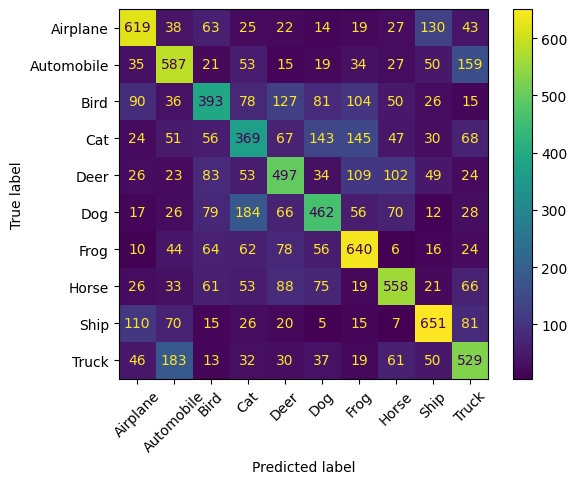

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_plot_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] # [range(10)]
# plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()
plt.xticks(rotation=45)
plt.show()

Summary in Student_MLE_MiniProject_Fine_Tuning_m3a.ipynb